# Increasing Customer Retention Using A/B Testing
## Analyzing customer log data from a mobile game

----
##### by Brenda Hali

## Problem Statement

Customer retention is the process of engaging existing customers to continue using/buying products or services from your firm. Inarguably, customer retention is the foundation of growth; without keeping your current users, firms will always be filling a leaky bucket. 
A firm can perform many analyses and tactics to increase customer retention, and product A/B testing is one of them. In this exercise, I will use product data from the mobile game [Cookie Cats](https://tactilegames.com/cookie-cats/) to find the optimal path to retention.

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. As players progress through the game, they will encounter gates that force them to wait before they can advance or make an in-app purchase. 

## Goal

Analyze the result of a product A/B test. The first gate in Cookie Cats was moved from level 30 to level 40; how does this impact player retention?

![Area Locked](https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png)


### Data

[Public dataset from Kaggle](https://www.kaggle.com/yufengsui/mobile-games-ab-testing)

#### Data Description

* **userid**  - An identification number that identifies individual users.
* **version** - Experimental control group. (gate_30, gate_40)
* **sum_gamerounds** - The number of rounds played by the user in the 14 days after the first install.
* **retention_1** - Did the player come back and play 1 day after installing?
* **retention_7** - did the player come back and play 7 days after installing?

___


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# Loading and exploring data

url = 'https://drive.google.com/file/d/11uCHqlSzGzBsVb5HEC6uOqX4sPYsS7ci/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)


df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Exploratory Data Analysis and Preparation

In this phase, we will analyze statistically the data, find trends, outliers and plot different slices of the dataset for visual analysis.

I like to visualize every step of the process. Data visualization makes it easier to see trends and patterns in a clear and appealing way. It can also make it easier to compare sets of data and identify different relationships between the data than in something such as a table. 


In [3]:
#Looking for missing values. Identifiying datatypes and dataset size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


Fortunately, the dataset does not have missing values

In [4]:
# How many players are in each version of the A/B Test? 

df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


The data looks evenly distributed.

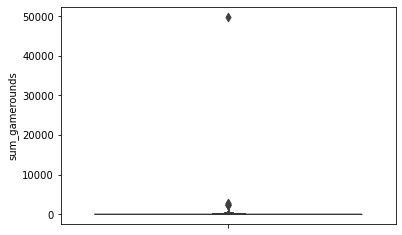

In [5]:
# Boxplot game rounds

sns.boxenplot(data=df, y='sum_gamerounds');

* We can identify an outlier. Obviously, there are people who played nearly 50,000 games in the first 14 days, but it's hard to say that this is a typical usage.

* We have an incredibly skewed data distribution.

Further exploration is needed.

In [6]:
df[df['sum_gamerounds'] > 45000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [7]:
# Removing outlier 

df = df[df['sum_gamerounds'] < 45000 ]
print(df.shape)
df.tail()

(90188, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [8]:
# Analizing game rounds statistics without outlier
df.sum_gamerounds.describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

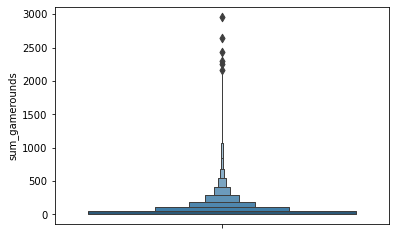

In [9]:
#Ploting data distribution

sns.boxenplot(data=df, y='sum_gamerounds');

### Data Analysis

In this phase, we will analyze statistically the data, find trends, outliers and plot different slices of the dataset for visual analysis.

I like to visualize every step of the process. Data visualization makes it easier to see trends and patterns in a clear and appealing way. It can also make it easier to compare sets of data and identify different relationships between the data than in something such as a table. 


In [10]:
# Creating a dataframe with the count user's games run
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df.head()

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
Name: userid, dtype: int64

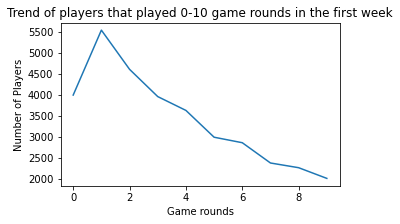

In [11]:
plot = plot_df[0:10].plot(figsize=(5,3))
plot.set_title('Trend of players that played 0-10 game rounds in the first week')
plot.set_ylabel('Number of Players')
plot.set_xlabel('Game rounds');

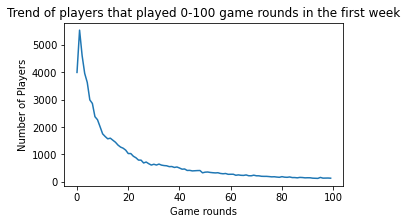

In [12]:
plot = plot_df[:100].plot(figsize=(5,3))
plot.set_title('Trend of players that played 0-100 game rounds in the first week')
plot.set_ylabel('Number of Players')
plot.set_xlabel('Game rounds');

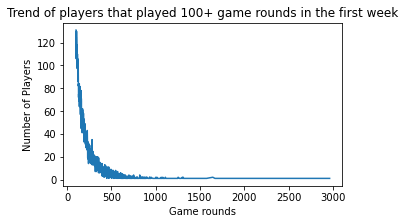

In [13]:
plot = plot_df[100:].plot(figsize=(5,3))
plot.set_title('Trend of players that played 100+ game rounds in the first week')
plot.set_ylabel('Number of Players')
plot.set_xlabel('Game rounds');

/Users/bh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


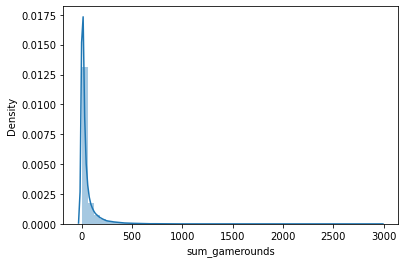

In [14]:
sns.distplot(df['sum_gamerounds']);

* The number of users who have installed the game and have never played it is significant.
* When the players install the game and play it, somehow get hooked to the game and play it again. 
* High 1-day retention makes it easy to grow your subscriber base.

Let's analyze further 1 and 7 day retention:

In [15]:
# Average 1-day retention per group
print(df['retention_1'].mean())
print(df.groupby('version')['retention_1'].mean())
print('-----')
print(df['retention_7'].mean())
print(df.groupby('version')['retention_7'].mean())



0.4452144409455803
version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64
-----
0.1860557945624695
version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64


In [16]:
#Difference
print('Day 1 Difference in %', (0.448198-0.442283)*100)
print('Day 7 Difference in %', (0.190183-0.182000)*100)


Day 1 Difference in % 0.5915000000000004
Day 7 Difference in % 0.8182999999999996



In both days we can see that there is a minimal, almost insignificant decrease in retention. It's a small difference, but this small difference will have an impact on your retention and even long-term returns. 

At this point, we could conclude that the gate in level 30 drives better customer retention and indicate to the product team to place the gate level 30. However, how do we know that this conclusion is true? Is there a way to statically test our conclusion? 

#### Bootstrapping

Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics. 


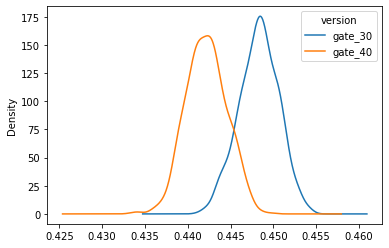

In [17]:
# Day 1

boot_1 = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1.append(boot_mean)
    
boot_1 = pd.DataFrame(boot_1) #Transforming to a dataframe
    
# Creating a data density plot
boot_1.plot.kde();

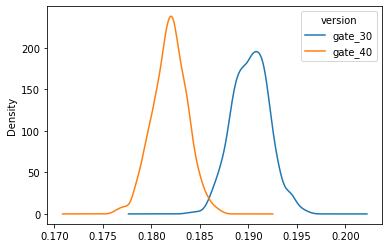

In [18]:
# Day 7

boot_7 = []

for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()
    boot_7.append(boot_mean)
    
boot_7 = pd.DataFrame(boot_7) #Transforming to a dataframe
    
# Creating a data density plot
boot_7.plot.kde();

In [19]:
print(boot_1.head())
print('------')
print(boot_7.head())

version       gate_30   gate_40
retention_1  0.448143  0.442154
retention_1  0.444519  0.445876
retention_1  0.450698  0.441191
retention_1  0.451333  0.438217
retention_1  0.444094  0.442602
------
version       gate_30   gate_40
retention_7  0.189066  0.182180
retention_7  0.189825  0.179526
retention_7  0.190790  0.183606
retention_7  0.190918  0.178902
retention_7  0.190827  0.181099


In [20]:
#Creating a new variable calculating the difference in % between the bootstrapped means

boot_1['diff'] = (boot_1.gate_30 - boot_1.gate_40)/boot_1.gate_40
boot_7['diff'] = (boot_7.gate_30 - boot_7.gate_40)/boot_7.gate_40


In [21]:
boot_1.head()

version,gate_30,gate_40,diff
retention_1,0.448143,0.442154,0.013544
retention_1,0.444519,0.445876,-0.003042
retention_1,0.450698,0.441191,0.021547
retention_1,0.451333,0.438217,0.029930
retention_1,0.444094,0.442602,0.003370


Mean of probability of high 1 day retention when gate is at level 30: 0.956


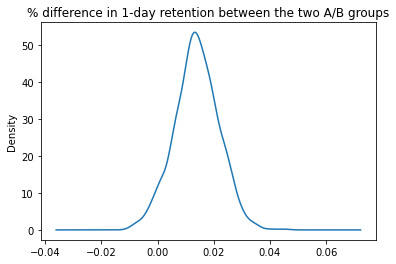

In [22]:
# Creating comparison graph

ax = boot_1['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two A/B groups')

print('Mean of probability of high 1 day retention when gate is at level 30:',(boot_1['diff'] > 0).mean())


Mean of probability of high 7 day retention when gate is at level 30: 1.0


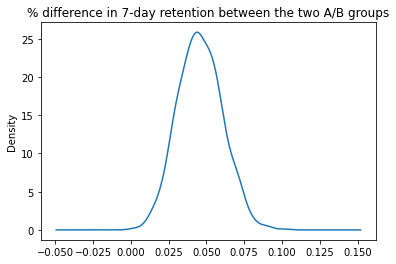

In [23]:
ax = boot_7['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two A/B groups')

print('Mean of probability of high 7 day retention when gate is at level 30:',(boot_7['diff'] > 0).mean())

* According to bootstrap analysis, it is likely that the daily retention rate will be higher when the gate is at level 30.
* It is important to notice that, since players only played for one day, it's very likely that most players haven't reached level 30 yet. In other words, for most users, retention would not have been affected by whether the gate was at 30 or not.
* After playing for a week, you should also check the 7-day retention as more players will reach levels 30 and 40.


In [24]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

Probability of high 7-day retention when the gate is at level 30: 1.0


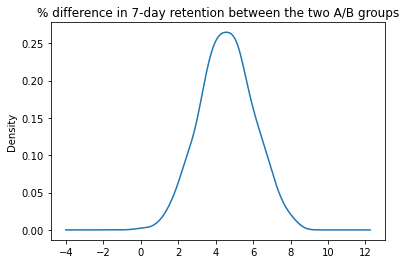

In [25]:

boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two A/B groups')

print('Probability of high 7-day retention when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

* According to bootstrap analysis, it is likely that the daily retention rate will be higher when the gate is at level 30.
* It is important to notice that, since players only played for one day, it's very likely that most players haven't reached level 30 yet. In other words, for most users, retention would not have been affected by whether the gate was at 30 or not.
* After playing for a week, you should also check the 7-day retention as more players will reach levels 30 and 40.
* **Conclusion** 
The results of the bootstrap analysis reinforce the findings in previous analysis; the gate should not be moved from level 30 to level 40 to increase retention. 

#### T-test
By performing a T-test in our dataset, we’ll judge our conclusion with statistics. 

In [26]:
#Creating new dataframes
df_30 = df[df['version'] == 'gate_30'] 
print(df_30.shape)
df_30.tail()

(44699, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False
90186,9999710,gate_30,28,True,False


In [27]:
df_40 = df[df['version'] == 'gate_40'] 
print(df_40.shape)
df_40.tail()

(45489, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [28]:
from scipy import stats
#Independent Sample T-Test (2 Sample T-Test)

tTestResult = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'])

tTestResultDiffVar = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'], equal_var=False)

tTestResult

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182521)

In [29]:
tTestResult = stats.ttest_ind(df_30['retention_7'], df_40['retention_7'])

tTestResultDiffVar = stats.ttest_ind(df_30['retention_7'], df_40['retention_7'], equal_var=False)

tTestResult

Ttest_indResult(statistic=3.1575495965685936, pvalue=0.0015915357297854773)

#### T Score baseline
A large t-score means that the two groups are different. Small t-score means that the two groups are similar.
-	Looking at the above analysis results, it can be seen that retention_1 was not significant in the two groups, and there was a significant difference in retention_7.
-	In other words, it is not by chance that retention_7 is higher than gate 30 and gate40.
-	That is, a gate at 30 is a better option for retention 7 days than at 40.


#### P-values baseline
The p-value is 0.05 at the 5% level. Small p-values are better. This means that the data didn't happen by accident.
For example, a p-value of 0.01 means that there is only 1% chance that the result will be accidentally. In most cases, a p-value of 0.05 (5%) is used as the standard. In this case, it is said to be statistically significant.

T-test was analyzed with retention as 0,1. Now that we selected retention as a categorical variable. It is better to do a chi-square test than this method.


#### Chi-square

The chi-square test used to test whether a categorical random variable 𝑋 is independent or correlated with another categorical random variable 𝑌. When the chi-square test is used to confirm independence, it is called a chi-square independent test.

* If the two random variables are independent, the 𝑌 distribution when 𝑋=0 and the 𝑌 distribution when 𝑋=1 must be the same. In other words, when the version is 30 and 40, the distribution of Y is the same.
* Therefore, two random variables are independent if they are adopted by performing a chi-square test with the null hypothesis that the sample sets come from the same probability distribution.nIf rejected, the two random variables are correlated.In other words, if the chi-square test result is rejected, the value of retention changes depending on whether the gate is 30 or 40.

* If each 𝑌 distribution according to the value of 𝑋 is given in the form of a two-dimensional table (contingency table), the difference between the independent distribution and the actual y sample volume is calculated as a test statistic. If this value is large enough, 𝑋 and 𝑌 are correlated.

In [30]:
# Sum the number of survivors by version to create a contingency table.
df.groupby("version").sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222937707836,2294941,20034,8501
gate_40,227857702576,2333530,20119,8279


In [31]:
# Getting the total number of users by version.
df.groupby("version").count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44699,44699,44699,44699
gate_40,45489,45489,45489,45489


### Create a contingency table by version.
||retention_1=False|retention_1=True|
|------|---|---|
|version=gate30|(44699-20034)|20034|
| version=gate40|(45489-20119)|20119|



||retention_7=False|retention_7=True|
|------|---|---|
|version=gate30|(44699-8501)|8501|
| version=gate40|(45489-8279)|8279|



In [32]:
import scipy as sp
obs1 = np.array([[20119, (45489-20119)], [20034, (44699-20034)]])
sp.stats.chi2_contingency(obs1)

(3.1698355431707994,
 0.07500999897705699,
 1,
 array([[20252.35970417, 25236.64029583],
        [19900.64029583, 24798.35970417]]))

The significance probability of the chi-square independent test is 7.5%.
We cannot say that 𝑋 and 𝑌 are correlated.

In [33]:
obs7 = np.array([[8501, (44699-8501)], [8279, (45489-8279)]])
sp.stats.chi2_contingency(obs7)

(9.915275528905669,
 0.0016391259678654423,
 1,
 array([[ 8316.50796115, 36382.49203885],
        [ 8463.49203885, 37025.50796115]]))

The significance probability of the chi-square independent test is 0.1%. There is strong evidence to say that 𝑋 and 𝑌 are correlated.

The retention after 7 days is correlated depending on whether the gate is at 30 or 40.
Gate should be held at 30 to maintain retention after 7 days.

### Action Plan

After several statistical test, to optimize for conversion, it is recommended that the game keeps the gate at level 30.

--- 

### Final thoughts


In practice, there are a number of metrics to measure retention In-app purchases, number of game play, referrer due to friend invitation, etc. And 

In this example, we just focused on one thing, but it is important that data, to work with mixes and test your assumptions.  